<a href="https://colab.research.google.com/github/Deeks900/GenAIBootcamp/blob/main/PyTorch_5_Exercise_nnSequential_Classifier_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classify the concentric circles dataset using a not-so-deep neural network with non-linear activations

The following has your usual imports along with the data generation `circle` and data visualization `decision_boundary` functions predefined for you. You'll start by learning about `circle` and progress to learning about `decision_boundary` later, towards the end of the notebook.

In [3]:
import torch as pt
import torch
from torch import nn
import matplotlib.pyplot as plt
import math
%matplotlib inline
pt.manual_seed(1337);
NUM =100
def circle(points = NUM, radius_lower = 9., radius_upper = 10.):
  radius = pt.zeros(points).uniform_(radius_lower, radius_upper)
  angle = pt.zeros(points).uniform_(0, 2 * math.pi)

  x = radius * pt.sin(angle)
  y = radius * pt.cos(angle)

  return x,y

def decision_boundary(forward_fn, x_min = -15, x_max = 15, y_min = -15., y_max = 15., step = 0.25):
  import numpy as np
  xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                      np.arange(y_min, y_max, step))

  Xg = np.hstack( (xx.ravel()[:, None], yy.ravel()[:, None]) )


  X_test = pt.from_numpy(Xg).to(pt.float)
  y_test = forward_fn(X_test).argmax(dim = 1).detach().numpy()

  Z = -1 * y_test.reshape(xx.shape)

  fig = plt.figure()
  plt.axis("equal")
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.4);
  plt.scatter(X[:NUM, 0], X[:NUM, 1], color = 'orange');
  plt.scatter(X[NUM:, 0], X[NUM:, 1])

## Generate a tuple of tensors for the `x` and `y` coordinates of the inner circle consisting of `100` data points by using the `circle` function.

For example, if you use

<code>
  circle(100, radius_lower = 6., radius_upper=9.)
</code>

The function is going to return a tuple with two tensors, each with a shape of `torch.Size([100])`

In [4]:
x, y = circle(NUM, radius_lower = 6., radius_upper=9.)
print(x)
print(y)

tensor([ 0.3046, -1.4043,  7.7368, -5.6713, -0.6979, -0.5920,  6.7577,  6.6438,
         6.3169,  6.5071, -7.3682, -7.7425, -5.9213,  1.9969,  5.9280, -5.0974,
         7.5000,  6.3981, -6.8285, -7.0145,  8.5098,  7.0707,  2.7654, -2.9142,
        -5.8586,  4.6811, -2.4855, -8.2082, -5.0934, -7.8707, -6.3787,  6.5070,
        -4.5503, -6.4472,  7.4478, -6.8768, -0.0980,  0.3102,  4.8415,  5.6184,
         1.7339, -3.2833,  6.1513,  3.8680, -2.3047,  4.2898, -6.1533,  3.3162,
         3.6273,  8.2488, -8.0854, -3.3246, -3.2973,  1.5498,  5.6141, -5.2677,
        -6.3086, -7.2289,  5.8218, -4.0896,  6.3585, -4.3898,  0.5452, -2.9338,
        -0.5381,  4.7743, -4.3960, -4.7954,  0.0405,  7.2106, -5.7707, -0.6832,
        -3.0849, -0.9661, -6.2791, -6.6893,  4.5320, -6.3171,  6.7196, -3.1073,
         5.0174, -3.1313, -6.9901, -6.7750,  7.7415,  5.2443,  7.3763, -6.2418,
        -4.0966,  7.0170,  1.7626,  5.8351,  0.8715, -7.6343, -5.3141, -6.9974,
        -8.2524,  1.0395,  3.7228,  6.83

## Figure out how to concatenate the `x` and `y` coordinates from the `circle` method into a single tensor

The concatenated tensor should have a of shape `torch.Size([100, 2])`

In [5]:
ic = torch.cat([x[:, None], y[:, None]], dim=1)
ic = torch.stack([x, y], dim=1)
ic

tensor([[ 0.3046,  6.2275],
        [-1.4043,  7.3540],
        [ 7.7368,  1.4377],
        [-5.6713,  4.5443],
        [-0.6979, -6.5642],
        [-0.5920, -6.0571],
        [ 6.7577, -3.8052],
        [ 6.6438,  4.6161],
        [ 6.3169,  1.6482],
        [ 6.5071, -1.8993],
        [-7.3682, -3.4259],
        [-7.7425,  0.0673],
        [-5.9213,  1.7419],
        [ 1.9969,  8.0568],
        [ 5.9280, -6.2767],
        [-5.0974,  4.3944],
        [ 7.5000,  2.1481],
        [ 6.3981,  5.0060],
        [-6.8285,  3.1752],
        [-7.0145, -1.7087],
        [ 8.5098, -1.6017],
        [ 7.0707,  0.2005],
        [ 2.7654,  8.2371],
        [-2.9142, -8.4006],
        [-5.8586,  1.4874],
        [ 4.6811,  6.7416],
        [-2.4855, -7.9876],
        [-8.2082,  3.2834],
        [-5.0934,  5.3637],
        [-7.8707,  3.2447],
        [-6.3787,  0.1625],
        [ 6.5070, -1.3199],
        [-4.5503, -5.1644],
        [-6.4472,  2.9812],
        [ 7.4478,  0.1247],
        [-6.8768,  4

## Do the same for the other circle

For example, you can use

<code>
    circle(100, radius_lower = 13., radius_upper=14.)
</code>

to generate an outer circle.

Don't forget to create a `torch.Size([100, 2])` tensor for the outer circle.

In [6]:
x, y = circle(NUM, radius_lower = 13., radius_upper=14.)
oc = torch.cat([x[:, None], y[:, None]], dim=1)
oc = torch.stack([x, y], dim=1)
oc

tensor([[  9.4622,  -8.9366],
        [-13.3580,  -3.1205],
        [  5.1084, -12.0505],
        [  1.0857, -13.0117],
        [-10.8878,  -8.5826],
        [ -8.9396,  10.3279],
        [ -9.4515,  -9.6803],
        [ 10.9079,   7.1324],
        [-13.1486,  -0.4898],
        [ 12.9559,  -3.7023],
        [-12.8643,  -2.3798],
        [ -4.7864,  12.4283],
        [-12.8958,   3.3126],
        [  8.0725, -10.4734],
        [-11.4236,  -7.3845],
        [ 13.1997,   1.5770],
        [-10.5134,   7.9237],
        [ 12.5752,  -4.5133],
        [ -9.8014,   9.4496],
        [  7.5302, -11.4003],
        [ -2.6320,  13.6311],
        [  1.9532,  12.9405],
        [ 12.4155,   6.3232],
        [ -0.8934,  13.8920],
        [  8.1537,  10.6300],
        [  0.8507,  13.6651],
        [ 12.4627,   4.2668],
        [ 11.8186,   7.1870],
        [ -7.4150,  11.1377],
        [  0.6131, -13.2737],
        [ -6.3439,  11.4595],
        [ -6.8438,  11.2520],
        [  0.4216, -13.3415],
        [ 

## Package the values for the circles into a single `X` tensor to use for training.

Assuming that you used 100 data points per circle, you should end up with an `X` tensor shaped `torch.Size([200, 2])`

In [7]:
X = torch.cat([ic, oc], dim=0)
x

tensor([  9.4622, -13.3580,   5.1084,   1.0857, -10.8878,  -8.9396,  -9.4515,
         10.9079, -13.1486,  12.9559, -12.8643,  -4.7864, -12.8958,   8.0725,
        -11.4236,  13.1997, -10.5134,  12.5752,  -9.8014,   7.5302,  -2.6320,
          1.9532,  12.4155,  -0.8934,   8.1537,   0.8507,  12.4627,  11.8186,
         -7.4150,   0.6131,  -6.3439,  -6.8438,   0.4216,  -4.3529, -10.7164,
        -12.0142,  13.3009,  -6.0167,  13.3223, -10.7927,  -5.2070,  11.5907,
         -5.5528,  11.5559, -12.8100,  -4.1946,   4.0747, -11.9800,   2.8744,
         -9.6526,   6.3591, -11.9223,   3.6681, -13.6776,  -5.1322,  12.7849,
         -2.5432,  -1.8374,  -7.9399, -13.7555,  -3.6452,   8.4171,   2.5372,
         11.5797,   8.6631,   6.6273, -11.8908,  11.0982,   6.0839, -10.5557,
         10.9614,  -5.1995, -13.2598,  13.0361,   6.1252,  13.7120,   3.3813,
          3.8838,  -1.0130, -10.4125,  11.8083,   9.0537,  -5.5690,   6.2060,
          8.4965,  13.1269,  -3.1223,   1.9858, -13.0260,  -1.85

In [8]:
X.shape

torch.Size([200, 2])

Plot the circles using `scatter`.

* **hint:** recall that you can use the `axis("equal")` method to make the x and y axes equal

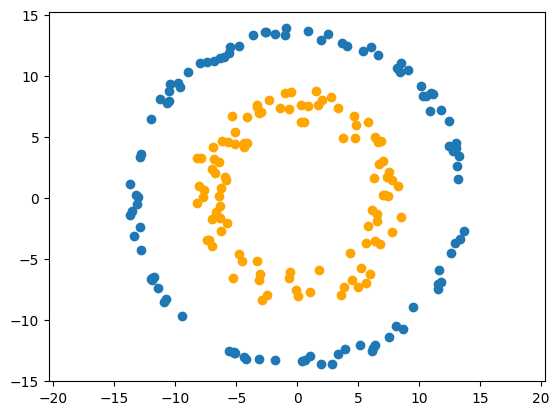

In [9]:
# prompt: Plot the circles using scatter.

import matplotlib.pyplot as plt
plt.figure()
plt.axis("equal")
plt.scatter(X[:NUM, 0], X[:NUM, 1], color = 'orange');
plt.scatter(X[NUM:, 0], X[NUM:, 1])


## Generate the `y` tensor with the classes for each of the circles.

PyTorch loss function does not use one-hot encoding and instead relies on ordinal encoding, where each integer represents a different class. For example, one of your circles would be `0`, another circle `1`, next `2`, and so one.

In this example you only have 2 circles, so use `0` for one of the circles and `1` for another. Your `y` tensor should have a shape of `torch.Size([200])`

In [10]:
y = torch.cat([torch.zeros(100), torch.ones(100)])
y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])

In [11]:
y.shape

torch.Size([200])

## Create a neural net using `nn.Sequential`.

It should have a single hidden layer with 3 neurons. All `nn.Linear` layers should use `nn.ReLU` activation function.The output layer should have `nn.LogSoftmax` after the activation function.

Don't forget that softmax assumes one-hot encoding for the outputs!

In [12]:
model = nn.Sequential(
    nn.Linear(2, 5),
    nn.ReLU(),
    nn.Linear(5, 3),
    nn.ReLU(),
    nn.Linear(3, 2),
    nn.LogSoftmax(dim=1)
)

In [13]:
torch.exp(model(X[:5]))

tensor([[0.6451, 0.3549],
        [0.5881, 0.4119],
        [0.2184, 0.7816],
        [0.4223, 0.5777],
        [0.3144, 0.6856]], grad_fn=<ExpBackward0>)

## Implement the `forward` function.

If your `nn.Sequential` is named `model`, then the forward pass can be as simple as returning `model(X)`.

In [14]:
def forward(X):
  return model(X)

## Complete the implementation of the cross entropy loss

If you used `nn.LogSoftmax` as the output layer of your model, you can use the negative log likelihood loss on the output of the softmax layer from `nn.functional.nll_loss`.

In [15]:
def loss(y_pred, y):
  return nn.functional.nll_loss(y_pred, y)

## Implement a `metric` method that computes the prediction accuracy

The accuracy should be on a scale from `0.0` to `1.0`

In [16]:
def accuracy(y_pred, y):
  return torch.sum((y_pred.argmax(dim=1) == y)) / len(y)

In [17]:
pt.exp(model(X[:5])), y[:5], accuracy(model(X[:5]), y[:5])

(tensor([[0.6451, 0.3549],
         [0.5881, 0.4119],
         [0.2184, 0.7816],
         [0.4223, 0.5777],
         [0.3144, 0.6856]], grad_fn=<ExpBackward0>),
 tensor([0., 0., 0., 0., 0.]),
 tensor(0.4000))

## Create an instance of the `optim.AdamW` optimizer

* **hint:** if you used `model` as the name of your instance of `nn.Sequential`, then `model.parameters()` can be used to create the optimizer

In [20]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

## Use the optimizer to discover the neural net weights for classification

You may need to perform thousands of steps of gradient descent. Don't forget to properly perform the forward and backward passes. If your instance of `AdamW` is named `optimizer`, then you can perform a gradient descent step using `optimizer.step()`. To zero out the gradients in the model, you can use `optimizer.zero_grad()`.

In [21]:
# run in GPU
device = torch.device('cuda')
model.to(device)
X = X.to(device)
y = y.to(device)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [22]:
for epoch in range(100):
  y_pred = forward(X)
  loss_value = loss(y_pred, y.to(torch.long))
  acc = accuracy(y_pred, y)
  print(f'epoch {epoch} loss {loss_value} accuracy {acc}')
  loss_value.backward()
  optimizer.step()
  optimizer.zero_grad()

epoch 0 loss 0.7231635451316833 accuracy 0.5450000166893005
epoch 1 loss 0.6738869547843933 accuracy 0.5699999928474426
epoch 2 loss 0.639184832572937 accuracy 0.5799999833106995
epoch 3 loss 0.6152560114860535 accuracy 0.6050000190734863
epoch 4 loss 0.6011095643043518 accuracy 0.6100000143051147
epoch 5 loss 0.5939812660217285 accuracy 0.6600000262260437
epoch 6 loss 0.5909121036529541 accuracy 0.675000011920929
epoch 7 loss 0.5896883606910706 accuracy 0.6800000071525574
epoch 8 loss 0.5881179571151733 accuracy 0.7200000286102295
epoch 9 loss 0.5865412354469299 accuracy 0.7300000190734863
epoch 10 loss 0.5839601755142212 accuracy 0.7599999904632568
epoch 11 loss 0.5801534652709961 accuracy 0.7799999713897705
epoch 12 loss 0.5754297375679016 accuracy 0.8199999928474426
epoch 13 loss 0.5702961683273315 accuracy 0.8299999833106995
epoch 14 loss 0.5652825236320496 accuracy 0.8149999976158142
epoch 15 loss 0.5609022974967957 accuracy 0.800000011920929
epoch 16 loss 0.5571796894073486 accu

The `decision_boundary` function declared previously in this notebook uses a grid of test data points to draw the decision boundary for your model. The grid is like a grid on graph paper, so that for every point on the grid, you are going to use the `forward` method of your model to find out the predicted values for the points and color the grid accordingly.

The `no_grad` function disables gradient calculations when performing the `forward`.



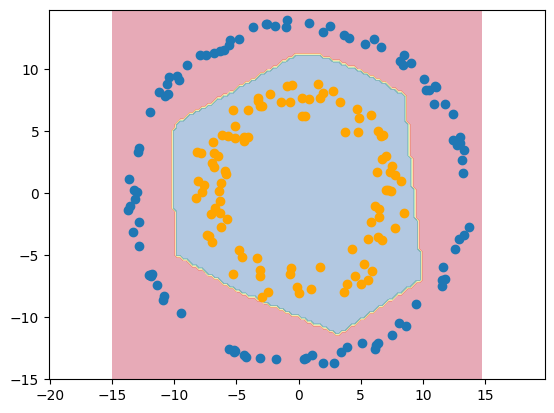

In [23]:
with pt.no_grad():
  model.to('cpu')
  X = X.to('cpu')
  y = y.to('cpu')
  decision_boundary(forward)